### This file plots the processed csv files with matplotlib

Note: manually select date and file name in the corresponding section (either cpu, netsend or netrecv)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [2]:
date = '2018-10-23_14h07'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/two_servers/' + date + '/'


In [3]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

## CPU utilization plot

In [7]:
# read data into pandas dataframe
file_name = 'dstat_server_cpu_ratio_1:0.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,cpu_mean,cpu_std
0,12,36.458629,4.141153
1,24,57.367516,0.478145
2,48,72.150723,0.250323
3,96,89.735944,0.071180
4,144,94.843207,0.277800
5,192,96.794962,0.186981
6,240,98.785737,0.111106
7,288,98.314390,0.141801
8,336,99.151493,0.150193


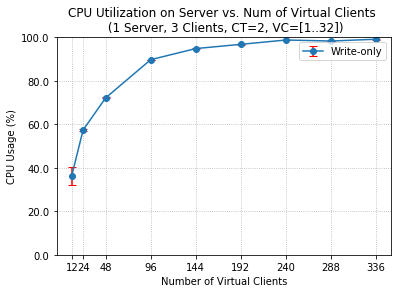

In [8]:
f = plt.figure()
plt.title("CPU Utilization on Server vs. Num of Virtual Clients \n (2 Server, 1 Client, CT=1, VC=[1..32])")

vcs = df_c['client']
ys = df_c['cpu_mean']
std = df_c['cpu_std']
plt.errorbar(x = vcs, y = ys, yerr = std, label = "Write-only", capsize = 4, ecolor='r', marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=100)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/two_servers/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network send activity plot

In [9]:
# read data into pandas dataframe
file_name = 'dstat_server_netsend_ratio_0:1.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,netsend_mean,netsend_std
0,4,1.052157e+07,406822.532650
1,8,1.247523e+07,28762.626909
2,16,1.249866e+07,23949.128616
3,32,1.250794e+07,40429.405955
4,48,1.254012e+07,6996.332069
5,64,1.249541e+07,12319.608174
6,80,1.252174e+07,7946.022085
7,96,1.255319e+07,23674.614707
8,112,1.257723e+07,16732.121455


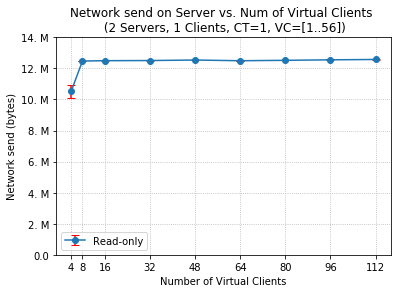

In [11]:
f = plt.figure()
plt.title("Network send on Server vs. Num of Virtual Clients \n (2 Servers, 1 Clients, CT=1, VC=[1..56])")

vcs = df_c['client']
ys = df_c['netsend_mean']
std = df_c['netsend_std']
plt.errorbar(x = vcs, y = ys, yerr = std, label = "Read-only", capsize = 4, ecolor='r', marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network send (bytes)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=14000000)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/two_servers/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network recv activity plot

In [9]:
# read data into pandas dataframe
file_name = 'dstat_client_netrecv_ratio_0:1.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,netrecv_mean,netrecv_std
0,2,4.617249e+06,23006.428571
1,4,4.553825e+06,14818.285714


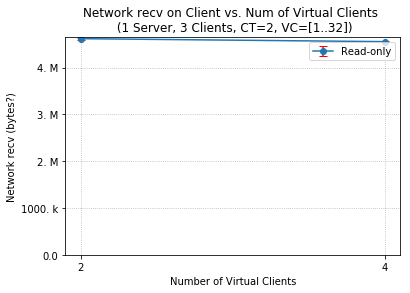

In [10]:
f = plt.figure()
plt.title("Network recv on Client vs. Num of Virtual Clients \n (2 Server, 1 Client, CT=1, VC=[1..32])")

vcs = df_c['client']
ys = df_c['netrecv_mean']
std = df_c['netrecv_std']
plt.errorbar(x = vcs, y = ys, yerr = std, label = "Read-only", capsize = 4, ecolor='r', marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network recv (bytes?)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0)
plt.legend()


ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/two_servers/"+date+"/"+file_name[:-4]+".png", dpi = 150)